# Bayesian Structural Time Series Models for Extracting Causal Impact of Events from Data

Structural time series are a type of state-space model. State-space models posit that the observations comprising a time series are a function of a hidden state that evolves over time via a Markov process depending on the previous state. A structural time series model assumes that the relationship between a state and the previous state and between states and observations take a particular functional form. The solution to these models is achieved through Kalman filtering, employing spike-and-slab priors for estimating regression coefficients and using Bayesian model averaging to integrate the solution components. 

The $2015$ paper from Google researchers communicates the details,

    Brodersen, Kay H., Fabian Gallusser, Jim Koehler, Nicolas Remy, and Steven L. Scott. "Inferring causal impact using Bayesian structural time-series models." The Annals of Applied Statistics (2015): 247-274.


# Analysis-1: Causal Impact of Team Ownership on Total Season Wins in Major League Baseball

The Los Angeles Dodgers (LAD) have entered a golden era of winning as of September 2022. The Guggenheim Group bought the Dodgers from Frank McCourt in  2012 , approximately coinciding with the Dodgers latest rise to dominance. We want to use the tools of causal inference to quantify the impact ownership by the Guggenheim Group has had on total Dodger season wins. We use the total season wins by other MLB teams as control time series to predict the counterfactual for Dodger wins without a change in ownership in $2012$ using a Bayesian structural time series model.

### Imports

In [2]:
%matplotlib inline

# Turn off warnings for now
import warnings
warnings.filterwarnings('ignore')

# Numeric and data manipulation libraries
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt

# Causal inference
from causalimpact import CausalImpact

### Data Ingest and prep

In [3]:
df = pd.read_csv('./data/data_combine.csv')
#df.tail(30)

### Research Question

The Los Angeles Dodgers (LAD) have entered a golden era of winning as of September 2022. The Guggenheim Group bought the Dodgers from Frank McCourt in $2012$, approximately coinciding with the Dodgers latest rise to dominance. We want to use the tools of causal inference to quantify the impact ownership by the Guggenheim Group has had on total Dodger season wins. We use the total season wins by other MLB teams as control time series to predict the counterfactual for Dodger wins without a change in ownership in $2012$ using a Bayesian structural time series model. 

The literature reference for the Bayesian structural inference approach to inferring causal impact is the $2015$ paper from Google researchers,

    Brodersen, Kay H., Fabian Gallusser, Jim Koehler, Nicolas Remy, and Steven L. Scott. "Inferring causal impact using Bayesian structural time-series models." The Annals of Applied Statistics (2015): 247-274.
    
We get started by visualizing the time series of season wins of the dodgers versus other major league teams in the same time period. We take the New York Mets (NYM) as a stand-in for other major league teams to simplify the visualization. We take the analysis only through the $2019$ MLB season in order to avoid needing to account for the COVID-shortened $2020$ season.

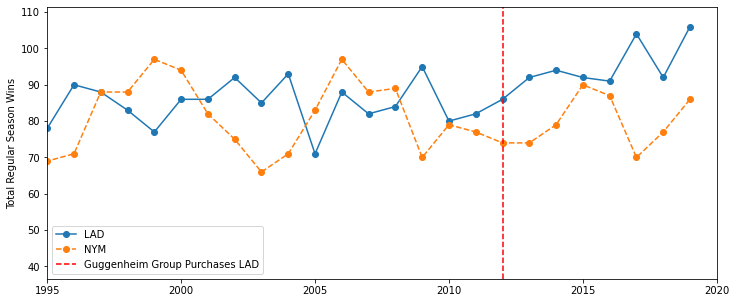

In [4]:
plt.figure(figsize=(12,5))
plt.plot(df['yearID'], df['LAD'],  '-o', label='LAD')
plt.plot(df['yearID'], df['NYM'], '--o', label='NYM')

plt.axvline(x=2012, color ='r', linestyle='--',label = 'Guggenheim Group Purchases LAD')
plt.xlim(1995, 2020)

plt.ylabel('Total Regular Season Wins')

plt.legend();

### Prepare dataset for causal impact analysis

We perform the causal impact analysis on the last $30$ seasons, with the final $8$ seasons having the Dodgers under the ownership of the Guggenheim Group.

In [5]:
# create a simplified dataframe for the causal impact (ci) analysis

df_ci = df[['LAD', 'NYM']].tail(30)
df_ci = df_ci.reset_index(drop=True)

df_ci.columns = ['y', 'x1']

### Viz target dataset

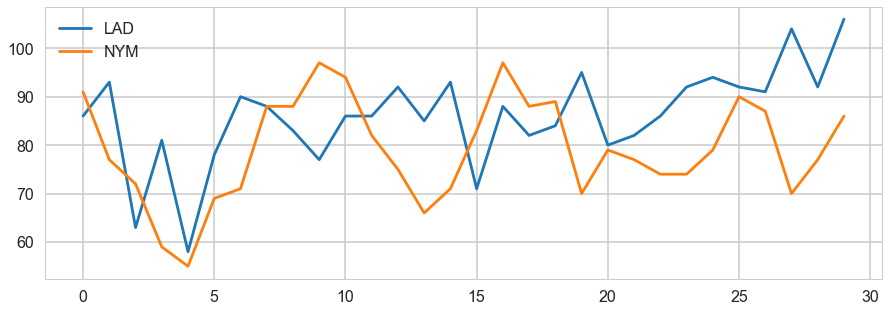

In [6]:
plt.figure(figsize=(15,5))

plt.style.use('default')
plt.style.use('seaborn-whitegrid')
plt.style.use('seaborn-poster')

plt.plot(df_ci['y'], label='LAD');
plt.plot(df_ci['x1'], label='NYM');

plt.legend();

### Bayesian Structural Time Series Model for Causal Impact Inference

In [7]:
pre_period = [0,22]
post_period = [23,30]

In [8]:
impact = CausalImpact(df_ci, pre_period, post_period)

In [9]:
impact.run()

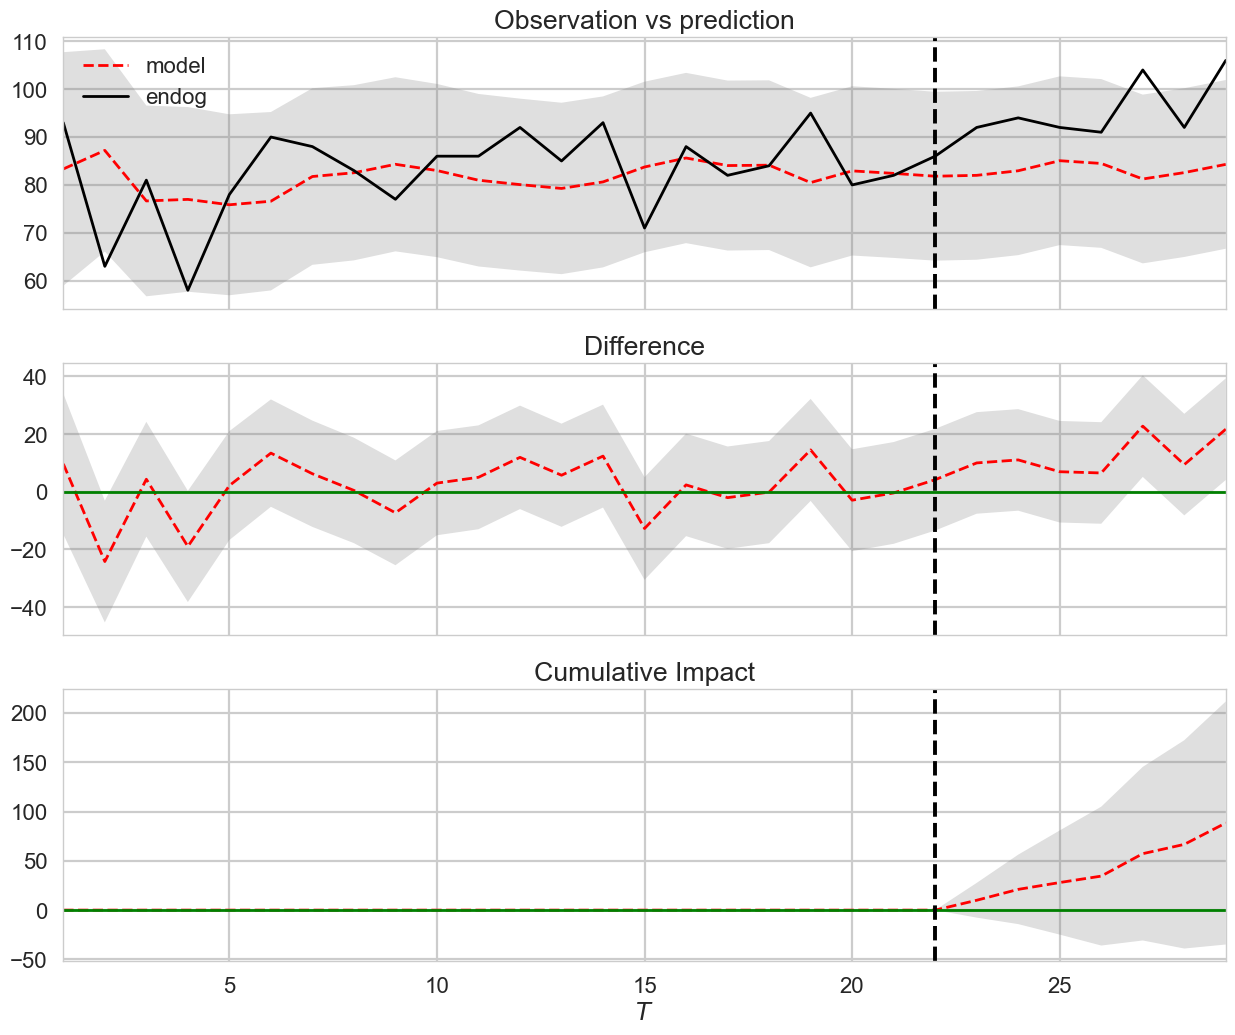

In [10]:
impact.plot()

In [11]:
impact.summary()

                               Average      Cumulative
Actual                              95             671
Predicted                           83             582
95% CI                       [65, 100]      [459, 705]
                                                      
Absolute Effect                     12              88
95% CI                        [30, -4]      [211, -34]
                                                      
Relative Effect                  15.2%           15.2%
95% CI                  [36.3%, -6.0%]  [36.3%, -6.0%]
                                                      
P-value                           0.0%                
Prob. of Causal Effect          100.0%                


In [12]:
impact.summary(output="report")

During the post-intervention period, the response             variable had an average value of             approx. 95.
By contrast, in  the absence of an intervention, we would have expected an average response of 83. The 95% interval of
this counterfactual prediction is [65, 100]. Subtracting this prediction from the observed response yields an estimate
of the causal effect the intervention had on the response variable. This effect is 12 with a 95% interval of [30, -4].
For a discussion of the significance of this effect, see below.


 Summing up the individual data points during the post-intervention period (which can only sometimes be meaningfully
interpreted), the response variable had an overall value of 671.  By contrast, had  the intervention not taken place, we
would have expected a sum of 582. The 95% interval of this prediction is [459, 705]


 The above results are given in terms of absolute numbers. In relative terms, the response variable showed  an increase
of  15.2%. The

During the post-intervention period, the response variable had an average value of approx. 95.
By contrast, in  the absence of an intervention, we would have expected an average response of 83. The 95% interval of this counterfactual prediction is [65, 100]. Subtracting this prediction from the observed response yields an estimate of the causal effect the intervention had on the response variable. This effect is 12 with a 95% interval of [30, -4]. For a discussion of the significance of this effect, see below.


Summing up the individual data points during the post-intervention period (which can only sometimes be meaningfully
interpreted), the response variable had an overall value of 671.  By contrast, had  the intervention not taken place, we
would have expected a sum of 582. The 95% interval of this prediction is [459, 705]


 The above results are given in terms of absolute numbers. In relative terms, the response variable showed  an increase
of  15.2%. The 95% interval of this percentage is [36.3%, -6.0%]


 This means that the positive effect observed during the intervention period is statistically significant and unlikely
to be due to random fluctuations. It should be noted, however, that the question of whether this increase also bears
substantive significance can only be answered by comparing the absolute effect 12 to the original goal of the underlying
intervention.


The probability of obtaining this effect by                 chance is very small (Bayesian one-sided tail-area
probability 0.0). This means the                 causal effect can be considered statistically
significant.
â€‹

### Summary of Analysis-1

The Guggenheim ownership of the Dodgers does appear to correlate with higher win totals, but the error bars are quite huge. We can get a clearer picture of the power of Bayesian Structural Time Series models using a synthetic dataset with less noise.

# Analysis-2: Synthetic Time Series Example

We generate a synthetic time series using the StatsModels library. We generate Autoregressive Moving Average (ARMA) model. The data models a weakly stationary stochastic time series process in terms of two polynomials, one for autoregression and one for moving average. 

In [13]:
from statsmodels.tsa.arima_process import arma_generate_sample

In [20]:
np.random.seed(1)

x1a = arma_generate_sample(ar=[0.999], ma=[0.9], nsample=500) + 250
y = 1.2 * x1a + np.random.randn(500)

We simulate an event that increases the y values on the time series by 5 units.

In [21]:
y[350:500] = y[350:500] + 5
data = pd.DataFrame(np.array([y, x1a]).T, columns=["y","x1a"])

In [22]:
pre_period = [0,349]
post_period = [351,500]

impact = CausalImpact(data, pre_period, post_period)

impact.run()

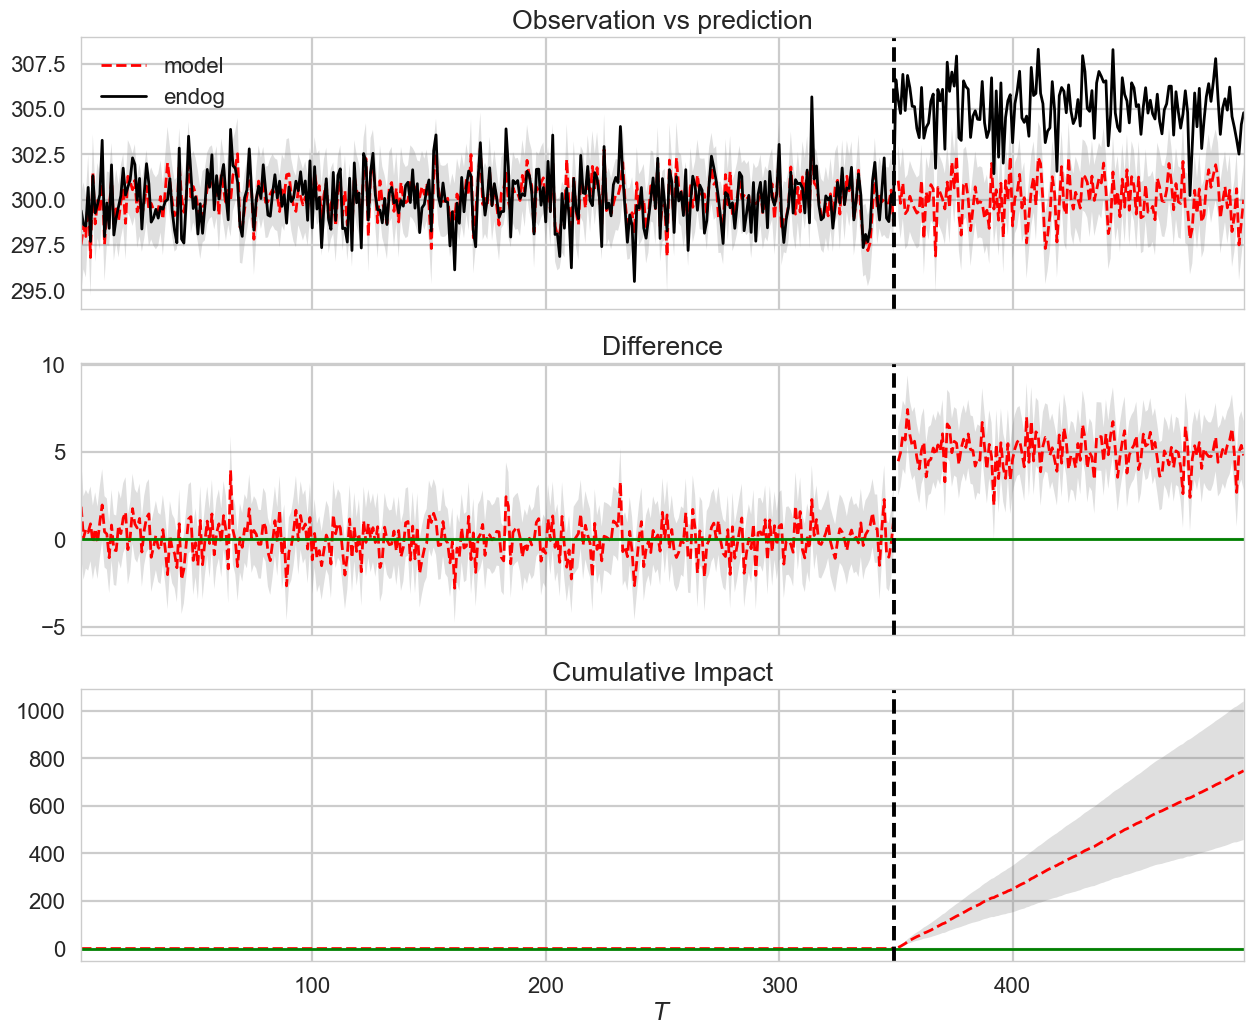

In [23]:
impact.plot()

In [24]:
impact.summary()

                             Average      Cumulative
Actual                           305           45456
Predicted                        300           44707
95% CI                    [298, 302]  [44416, 44999]
                                                    
Absolute Effect                    5             748
95% CI                        [6, 3]     [1039, 456]
                                                    
Relative Effect                 1.7%            1.7%
95% CI                  [2.3%, 1.0%]    [2.3%, 1.0%]
                                                    
P-value                         0.0%                
Prob. of Causal Effect        100.0%                


In [19]:
# verbal interpretation:

impact.summary(output="report")

During the post-intervention period, the response             variable had an average value of             approx. 305.
By contrast, in  the absence of an intervention, we would have expected an average response of 300. The 95% interval of
this counterfactual prediction is [298, 302]. Subtracting this prediction from the observed response yields an estimate
of the causal effect the intervention had on the response variable. This effect is 5 with a 95% interval of [6, 3]. For
a discussion of the significance of this effect, see below.


 Summing up the individual data points during the post-intervention period (which can only sometimes be meaningfully
interpreted), the response variable had an overall value of 45456.  By contrast, had  the intervention not taken place,
we would have expected a sum of 44707. The 95% interval of this prediction is [44416, 44999]


 The above results are given in terms of absolute numbers. In relative terms, the response variable showed  an increase
of  1.7%. The 95% interval of this percentage is [2.3%, 1.0%]


 This means that the positive effect observed during the intervention period is statistically significant and unlikely
to be due to random fluctuations. It should be noted, however, that the question of whether this increase also bears
substantive significance can only be answered by comparing the absolute effect 5 to the original goal of the underlying
intervention.


The probability of obtaining this effect by                 chance is very small (Bayesian one-sided tail-area
probability 0.0). This means the                 causal effect can be considered statistically
significant.